## STANDARD VECTOR MACHINE

## data:
Attribute Information:

<ol>
     <li> ID number
     <li> Diagnosis (M = malignant, B = benign)
     <li> 3-32) Ten real-valued features are computed for each cell nucleus:
         <ul>
             <li> radius (mean of distances from center to points on the perimeter)
             <li>texture (standard deviation of gray-scale values)
            <li>perimeter
            <li>area
            <li>smoothness (local variation in radius lengths)
            <li>compactness (perimeter^2 / area - 1.0)
            <li>concavity (severity of concave portions of the contour)
            <li>concave points (number of concave portions of the contour)
            <li>symmetry
            <li>fractal dimension ("coastline approximation" - 1)
         </ul>
 </ol>

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### TASK 1

* Import the 'Breast_Cancer_Data' data from folder data to classify malignant and benign patients.
* Set the id as index
* Examine numerical and categorical data
* Convert the diagnosis to binary where malignant patients represented as 1
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [397]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [399]:
data=pd.read_csv("data\\Breast_Cancer_Data.csv")

In [401]:
data.set_index('id', inplace=True)

In [403]:
numerical_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

print("Numerical Data:")
print(numerical_data.describe())

print("\nCategorical Data:")
print(categorical_data.describe())

Numerical Data:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000

In [405]:
data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0}).astype(int)
data.head()
y = data['diagnosis'].astype(int)

In [407]:
fields = list(data.columns[1:])  # everything except the last column
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True, ascending=False)
correlations

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0

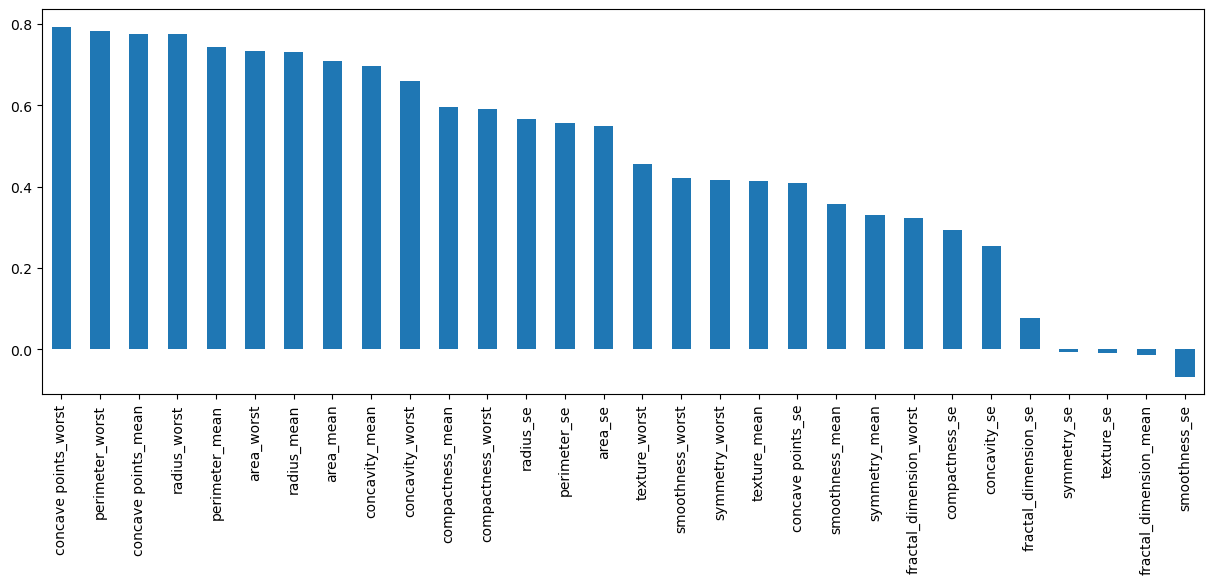

In [409]:
correlations.plot(kind='bar', figsize=(15,5))
plt.tick_params(labelsize=10);

In [410]:
correlations.abs().nlargest(2).index
X=data[correlations.abs().nlargest(2).index]

In [413]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X=scaler.fit_transform(X)
X=pd.DataFrame(X, columns=correlations.abs().nlargest(2).index)

X.head()

,concave points_worst,perimeter_worst
0,0.912027,0.668310
1,0.639175,0.539818
2,0.835052,0.508442
3,0.884880,0.241347
4,0.558419,0.506948


### TASK 2

The goal for this question is to look at the decision boundary of a LinearSVC classifier on this dataset

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
```

Feel free to experiment with different parameter choices for LinearSVC and see the decision boundary.

In [416]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y)

LinearSVC()

C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


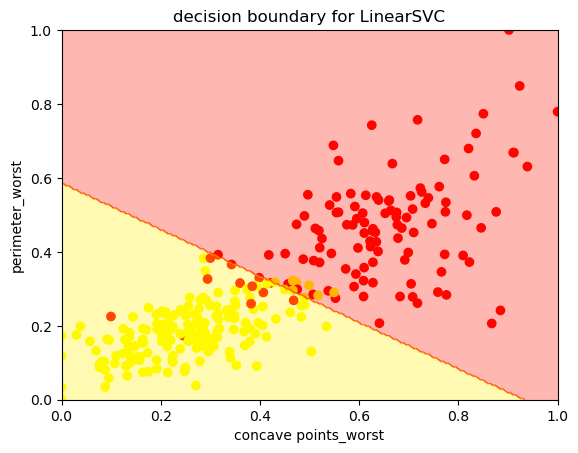

In [418]:
X_color=X.sample(300, random_state=45)
y_color = y.iloc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)
# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(
    xlabel=correlations.index[0],
    ylabel=correlations.index[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

### TASK 3

Let's Find Best Parameters from GridSearchCV
* Define the parameters in parameter grid:
<ol>
    <li> C: 0.1, 1, 10, 100
    <li> gamma: 1, 0.1, 0.01, 0.001
    <li> 'kernel' : rbf, linear, poly
</ol>

* Create the GridSearchCV with estimator as SVC() and assign the grid parameter defined
* Train using `X` and `y`
* Print the `best_parameter_`
* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary.
* Call the function and assign your best_estimator as estimator


In [421]:
gammas = [1, 0.1, 0.01, 0.001]
Cs = [0.1, 1, 10, 100]
kernels = ['rbf', 'linear', 'poly']

In [423]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [425]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=True)

In [427]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [429]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'poly', 'rbf']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=2)

In [430]:
from sklearn.metrics import classification_report
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

SVC(C=100, gamma=0.1)
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


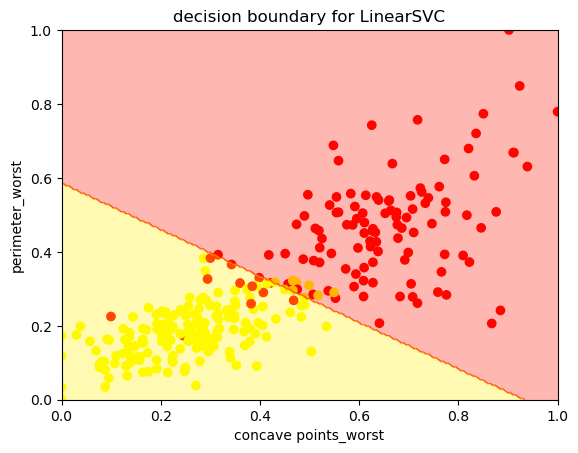

In [431]:
X_color=X.sample(300, random_state=45)
y_color = y.iloc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)
# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(
    xlabel=correlations.index[0],
    ylabel=correlations.index[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


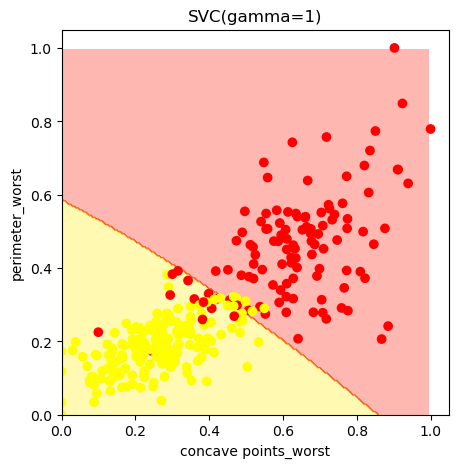

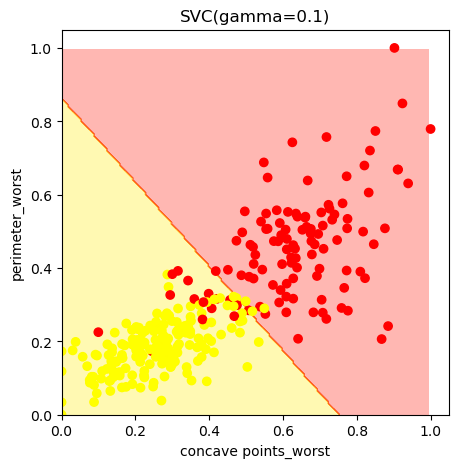

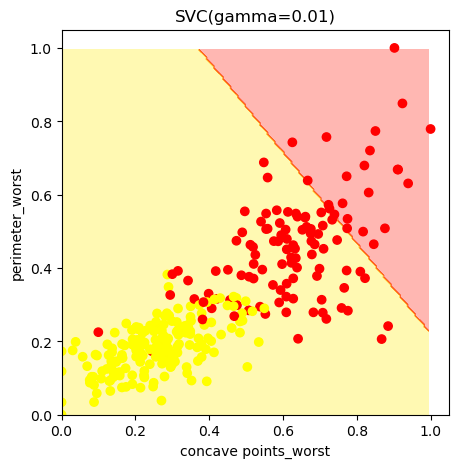

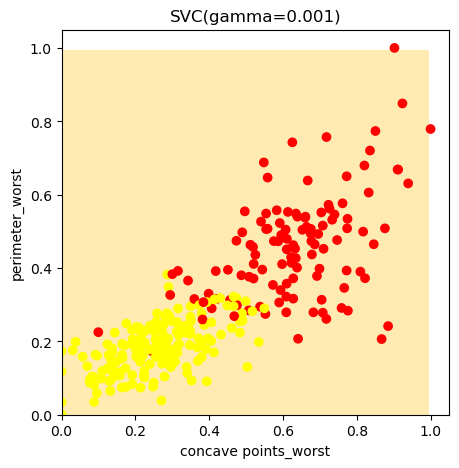

In [434]:
from sklearn.svm import SVC

gammas = [1, 0.1, 0.01, 0.001]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


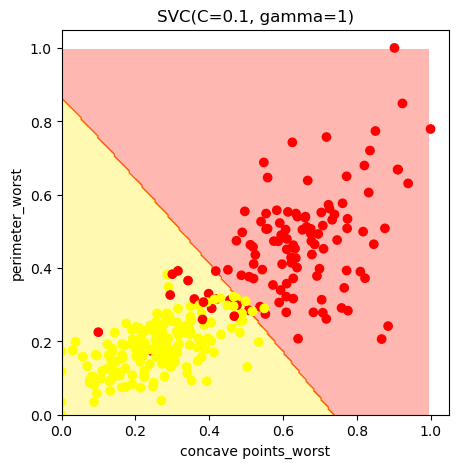

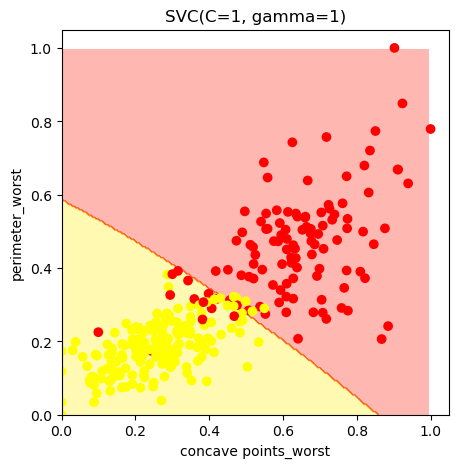

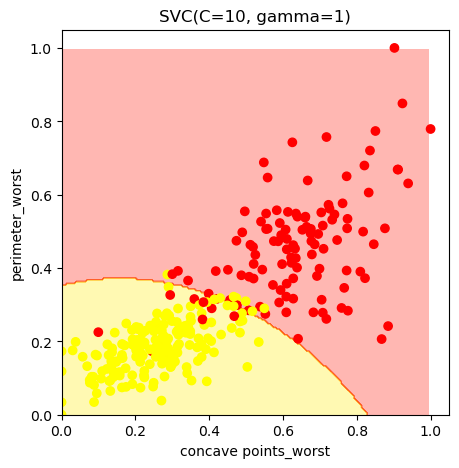

In [436]:
Cs = [.1, 1, 10]
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=1, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y)

C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


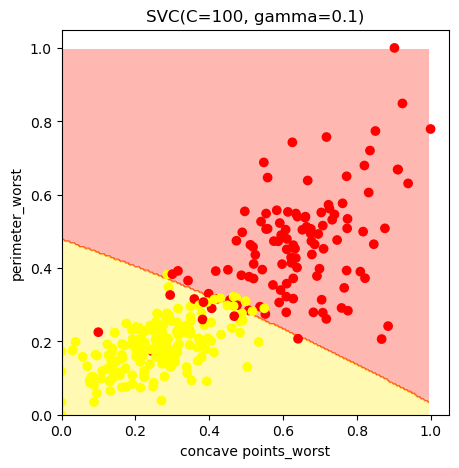

In [437]:
SVC_Gaussian = SVC(kernel='rbf', gamma=0.1, C=100)
plot_decision_boundary(SVC_Gaussian, X, y)

In [438]:
print("Best parameters found: ", grid.best_params_)
best_model = grid.best_estimator_

Best parameters found:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


### TASK 4

This is to test understanding in creating SVC model

* Split train and test using the `X` and `y`
* Define SVC model and assign parameters value based on best_estimator_ gained from GridSearchCV conducted previously.
* Train the model with Training data
* Predict using Testing data
* Print the classification report

In [440]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=True)

C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[Text(0.5, 0, 'concave points_worst'),
 Text(0, 0.5, 'perimeter_worst'),
 Text(0.5, 1.0, 'SVC(C=100, gamma=0.1)')]

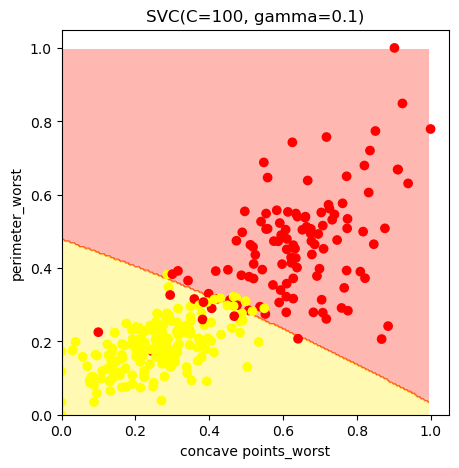

In [441]:
SVC_Gaussian = SVC(kernel='rbf', gamma=0.1, C=100)

SVC_Gaussian.fit(X, y)
X_color = X.sample(300, random_state=45)
y_color = y.iloc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = SVC_Gaussian.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(5, 5))
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
ax.set(
    xlabel=correlations.index[0],
    ylabel=correlations.index[1],
    title=str(SVC_Gaussian))

In [442]:
svc_model.fit(X_train, y_train)

SVC(C=100, gamma=0.1, random_state=42)

In [443]:
y_pred = svc_model.predict(X_test)

In [444]:
best_params = grid.best_params_ 
svc_model = SVC(C=best_params['C'],gamma=best_params['gamma'],kernel=best_params['kernel'],random_state=42)

In [445]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

